## pTumbler Analysis - General Calculations

## Purpose
This document serves as the repository for all analysis for the pTumbler project.

In [3]:
'''
%pip install numpy
%pip install pyyaml
%pip install pint
%pip install matplotlib
'''

'\n%pip install numpy\n%pip install pyyaml\n%pip install pint\n%pip install matplotlib\n'

In [6]:
# Base Libraries for all Ondroid projects
import numpy, yaml, pint
import numpy as np
import matplotlib.pyplot as plt

# Boilerplate
## Initialize Pint Registry for Unit Manipulation
## See documentation on Registries and Units in Pint here:
## https://pint.readthedocs.io/en/stable/getting/tutorial.html
from pint import UnitRegistry
ureg = UnitRegistry(auto_reduce_dimensions=True)

In [7]:
preferred_units = [
   ureg.m,  # distance      L
   ureg.kilogram,  # mass          M
   ureg.s,  # duration      T
   ureg.c,  # temperature   Θ
   ureg.newton,  # force         L M T^-2
   ureg.W,  # power         L^2 M T^-3
]

In [8]:
# This is Boiler Plate code to be ignored - it's stored for use
    # later to read and write to files
# Sample picking up of Pint quantities for analysis

'''
# Dictionary to store the read Pint values
parameters = {}

# Open and read the file
with open('vars.txt', 'r') as file:
    for line in file:
        # Split the line into quantity name and value string
        quantity, value_str = line.strip().split(': ')
        
        # Parse the value string into a Pint quantity
        value = ureg(value_str)
        
        # Store the Pint quantity in the dictionary
        parameters[quantity] = value
# Create parameters
## Arms are defined starting at the shoulder, working down to the hand
parameters['L1'] = 750 * ureg.millimeter
parameters['L2'] = 500 * ureg.millimeter
parameters['L3'] = 150 * ureg.millimeter
parameters['LP'] = 150 * ureg.millimeter

## Masses are defined
## Note: Masses estimated. They need further conceptual design to refine
parameters['m1'] = 2.5 * ureg.kilogram
parameters['m2'] = 2.0 * ureg.kilogram
parameters['m3'] = 0.5 * ureg.kilogram

## A requirement of the project is to be able to lift a gallon of water
parameters['mP'] = 4.0 * ureg.kilogram
'''

# Sample closing out file and save manipulated parameters
'''
with open('vars.txt',  'w') as file:
    # Iterate th rough the pint values dictionary
    for quantity, value in parameters.items():
        # Format the value with 6 decimal places
        value_str = f"{quantity}: {value:.6f~P}"
        
        # Write the formatted string to the file, followed by a newline character
        file.write(value_str + '\n')
'''

'\nwith open(\'vars.txt\',  \'w\') as file:\n    # Iterate th rough the pint values dictionary\n    for quantity, value in parameters.items():\n        # Format the value with 6 decimal places\n        value_str = f"{quantity}: {value:.6f~P}"\n        \n        # Write the formatted string to the file, followed by a newline character\n        file.write(value_str + \'\n\')\n'

In [12]:
# Density of Aluminum
rho_al = 2.7 * ureg.g / (ureg.cm*ureg.cm*ureg.cm)

# Maximum Weight of Parts
W_p = 25 * ureg.lbf

# Required Speed
w_s = 12 * ureg.deg / ureg.s

# Speed of Motor
w_m = 10 * ureg.rpm

# Required Reduction
N_g = w_m / w_s

# Density of Media
rho_m = 90 * ureg.lbf / (ureg.ft*ureg.ft*ureg.ft)
# Length of Barrel, L_b, that can contain Media
L_b = 267 * ureg.mm

# Tm = Motor Torque
# Tw = Torque Generated by Weight
# Ta = Torque Remaining for Acceleration
# e = weight eccentricity
# D = diameter of the Barrel
D = 18 * ureg.mm
e = D/3

# Volume of Assembly (Aluminum parts that are rotating)
V_a = 2130538 * ureg.mm**3
# Weight of the Assembly
W_a = V_a * rho_al * 9.81 * (ureg.m / ureg.s**2)

# Mass of the media in worst case
Vm_wc = 3.14 * (D/2)**2 * L_b / 2

# Weight of the media
W_m = Vm_wc * rho_m

# Torque Generated by the Media, Parts & Assembly
T_w = e * (W_m + W_p + W_a)

# WC power required for system
# Torque (N.m) x Speed (RPM) / 9.5488
P_sys = T_w * w_s

print("weight of WC media")
print(W_m.to(ureg.lbf))

print("Torque generated by WC media + parts")
print(T_w.to(ureg.newton * ureg.m))

print("Power required of System")
print(P_sys)
print(P_sys.to(ureg.watt))
print(P_sys.to(ureg.hp))


print('required motor reduction')
print(round(N_g, 2))

weight of WC media
0.1079179169923301 force_pound
Torque generated by WC media + parts
1.0087028591913105 meter * newton
Power required of System
47.49363927400844 force_pound * millimeter / second
0.21126223280602938 watt
0.00028330732089005276 horsepower
required motor reduction
5.0 dimensionless


In [11]:
# How many RPM is required for the drum?
print(w_s.to(ureg.rpm))

2.0000000000000004 revolutions_per_minute


# Plotting of Torque over rotation for Drum

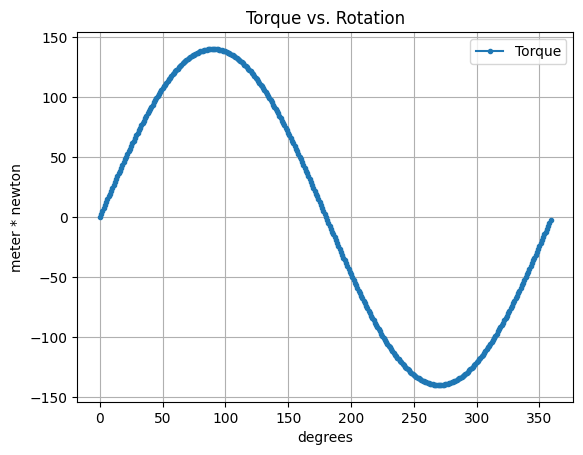

In [12]:
# Step 1: Define your X and Y values in lists
# For this example, let's use some sample data

# Initialize empty lists to store X (rotation) and Y (torque) values
x_values = []  # Rotation (X)
y_values = []  # Torque (Y)

for x in range(0, 360):  # This gives X values: 0, 1, 2, ..., 10
    e_fn = np.sin(np.radians(x))*e
    
    y = e_fn * (W_m + W_p)
    x_values.append(x)  # Append X value to the list
    x_label = 'degrees'
 
    y_values.append(y.to(ureg.newton * ureg.meter).magnitude) 
    y_label = str(y.to(ureg.newton * ureg.meter).units)



# Step 2: Create the plot
plt.plot(x_values, y_values, marker='.', linestyle='-', label='Torque')

# Step 3: Add labels and title
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('Torque vs. Rotation')
plt.legend()  # Show the label for the data

# Step 4: Add a grid for better readability
plt.grid(True)

# Step 5: Display the plot
plt.show()

In [17]:
# Declare the weight of the Frame
# Volume of the Barrel is from CAD as of 04/02/25
volumeBarrel = 8750962 * ureg.mm*ureg.mm*ureg.mm
W_b = volumeBarrel * rho_al * 9.81 * ureg.m / (ureg.s * ureg.s)
# Weight of Media, Parts & Frame
W_t = W_b + W_m + W_p

print(W_t.to(ureg.lbf))


258.56688345020075 force_pound


# Flexure Analysis
## Equation that relates deflection to length of beam
$$\delta = \frac{P \ell^3}{3EI} = \frac{W_tL_{flex}^3}{3EI}$$

## Equation for bending stress

$$ \sigma = \frac{mc} {I} = \frac{W_tL_{flex}\frac{h}{2}} {I} $$

## Equation for required length against FOS and yield strength

$$ \frac{\sigma I}{W_t\frac{h}{2}} = L_{flex}$$

In [35]:
# Effective length of Flexure
l_flex = 59.5 * ureg.mm

# Second moment of Area
B = 23.8 * ureg.mm
h = 3.18 * ureg.mm

I_flex = B*h**3 / 12

# E for Aluminum
E_st = 29000000 * ureg.psi

# Required deflection for flexure to generate load W_t
del_flex = (W_t * l_flex**3)/(3*E_st*I_flex)

# Stress generated in the flexure
sigma_b = W_t * l_flex * (h/2) / (I_flex)

# Yield Stress of 304 SS
sigma_y = 30 * ureg.ksi

# Required length to hit target normal stress generated at outer fiber
L_required = (sigma_y * I_flex) / (W_t * (h/2))


print("required deflection for flexure")
print(del_flex.to(ureg.mm))

print("bending stress in ksi for flexure")
print(sigma_b.to(ureg.ksi))

print("required length of flex to not break the flex")
print(L_required.to(ureg.mm))

required deflection for flexure
6.3327873890408375 millimeter
bending stress in ksi for flexure
247.4442425043483 kip_per_square_inch
required length of flex to not break the flex
7.213746345173633 millimeter
